In [ ]:
!pip install sklearn --upgrade
!pip install joblib
# Data preprocessing, math and plotting
import os
import numpy as np 
import pandas as pd 
from scipy import stats 
import matplotlib.pyplot as plt
import seaborn as sns 

# ML 
import sklearn
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.metrics import r2_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import datetime
import random



Requirement already up-to-date: sklearn in /usr/local/lib/python3.6/dist-packages (0.0)


In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

home_depot_products = pd.read_csv("gdrive/My Drive/home_depot_product_descriptions.csv")
home_depot_products.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,product_uid,product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...
4,100005,Update your bathroom with the Delta Vero Singl...


In [ ]:
home_depot_products_df = home_depot_products.dropna()
home_depot_products_df.shape

(124428, 2)

In [ ]:
home_depot_products_set = home_depot_products_df.head(500)
home_depot_products_set.iloc[:,1]

0      Not only do angles make joints stronger, they ...
1      BEHR Premium Textured DECKOVER is an innovativ...
2      Classic architecture meets contemporary design...
3      The Grape Solar 265-Watt Polycrystalline PV So...
4      Update your bathroom with the Delta Vero Singl...
                             ...                        
495    Add an updated look to your transitional decor...
496    The BLACK+DECKER EM1700 corded electric lawn m...
497    Wilsonart's 48 in. x 96 in. Breccia Nouvelle L...
498    The new and improved roundup 2 gal. Multi-Purp...
499    Krosswood Doors dress up both the entrance int...
Name: product_description, Length: 500, dtype: object

In [ ]:
# Feature extraction from product descriptions
# Converting the text in product description into numerical data for analysis

vectorizer = TfidfVectorizer(stop_words='english')
X1 = vectorizer.fit_transform(home_depot_products_set["product_description"])
X1

<500x8932 sparse matrix of type '<class 'numpy.float64'>'
	with 34817 stored elements in Compressed Sparse Row format>

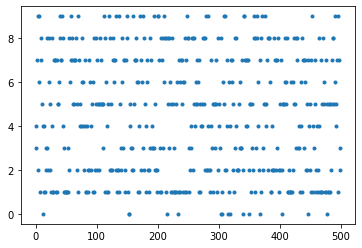

In [ ]:
# Visualizing product clusters in subset of data
# Fitting K-Means to the dataset
X=X1
kmeans = KMeans(n_clusters = 10, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)
plt.plot(y_kmeans, ".")
plt.show()

In [ ]:
# Top words in each cluster based on product description
true_k = 10

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X1)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

Top terms per cluster:
Cluster 0:
 air
 power
 cooling
 volt
 unit
 amp
 lithium
 control
 20
 protection
Cluster 1:
 ft
 100
 vary
 board
 rug
 product
 painting
 24
 painted
 10
Cluster 2:
 steel
 capacity
 brush
 wheels
 swivel
 construction
 tool
 lb
 features
 lbs
Cluster 3:
 helps
 insulation
 snow
 cover
 cutting
 easy
 metal
 design
 free
 included
Cluster 4:
 oven
 cycle
 cooking
 cu
 wash
 control
 options
 ft
 storage
 drawer
Cluster 5:
 door
 wood
 natural
 proposition
 nbsp
 residents
 california
 65
 bamboo
 concrete
Cluster 6:
 patio
 collection
 frame
 outdoor
 set
 dining
 bronze
 chairs
 fabric
 cushions
Cluster 7:
 lbs
 light
 storage
 wall
 finish
 shelves
 use
 commercial
 easy
 unit
Cluster 8:
 water
 handle
 toilet
 easy
 tank
 spray
 gal
 head
 flush
 heater
Cluster 9:
 installation
 use
 36
 fan
 tile
 wood
 offers
 home
 design
 easy


In [ ]:
# Predicting clusters based on key search words

# Predict cluster of "air"
print("Cluster ID:")
Y = vectorizer.transform(["air"])
prediction = model.predict(Y)
print(prediction)


Cluster ID:
[0]


In [ ]:
# Predict cluster of "steel"
print("Cluster ID:")
Y = vectorizer.transform(["steel"])
prediction = model.predict(Y)
print(prediction)

Cluster ID:
[2]


In [ ]:
# Visualize clusters
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD

In [ ]:
home_depot_products_set.to_dict('dict')
# tfs = vectorizer.fit_transform(home_depot_products_set.values())

# k = 50

# tfs_reduced = TruncatedSVD(n_components=k, random_state=0).fit_transform(tfs)
print(home_depot_products_set)

In [ ]:
tfs_embedded = TSNE(n_components=2, perplexity=40, verbose=2).fit_transform(tfs_reduced)


In [ ]:
fig = plt.figure(figsize = (10, 10))
ax = plt.axes()
plt.scatter(tfs_embedded[:, 0], tfs_embedded[:, 1], marker = "x", c = km.labels_)
plt.show()